In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load dataset
iris = load_iris()
X= iris.data
y=iris.target

In [ ]:
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.shape

(150, 4)

In [ ]:
df.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [ ]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
duplicate_rows = df[df.duplicated(keep=False)]
display(duplicate_rows)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
101,5.8,2.7,5.1,1.9
142,5.8,2.7,5.1,1.9


In [ ]:
df = df.drop_duplicates()
display(df.shape)

(149, 4)

In [ ]:
#feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

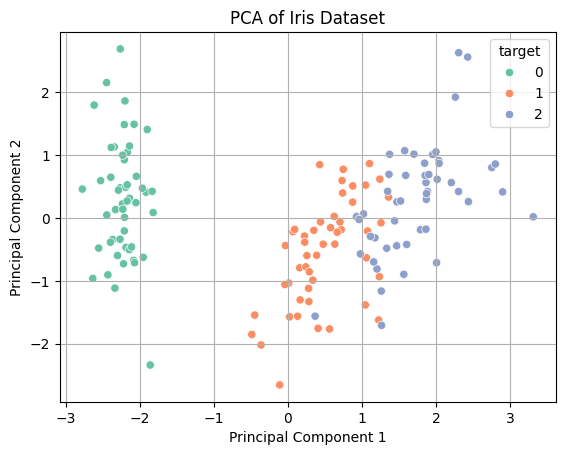

In [ ]:
#Convert dataframe for plotting
df = pd.DataFrame(data=X, columns=['PC1', 'PC2'])
df['target'] = y

#plot principal components
sns.scatterplot(data=df, x='PC1', y='PC2', hue='target', palette='Set2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.grid(True)
plt.show()

In [ ]:
#Variance captured
print("Explained Variance Ratio by PCA components:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio by PCA components:
[0.72962445 0.22850762]


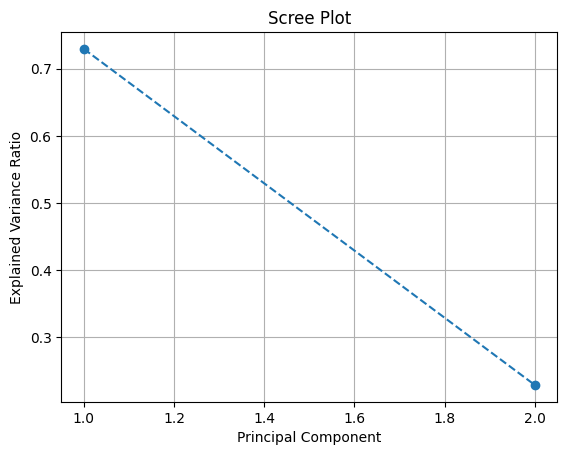

In [ ]:
#Scree Plot
plt.figure()
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_, marker='o',linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [ ]:
#Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Apply KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Make predictions
y_pred = knn.predict(X_test)

In [ ]:
#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9555555555555556

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  1 12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

